<a href="https://colab.research.google.com/github/Siarhei-Y/MNIST-Digit.Recognizer-CNNs/blob/master/TF_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_breast_cancer()


In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
D

30

In [ ]:
X_train.shape

(381, 30)

In [ ]:
X_train

array([[1.481e+01, 1.470e+01, 9.466e+01, ..., 7.955e-02, 2.334e-01,
        6.142e-02],
       [1.193e+01, 2.153e+01, 7.653e+01, ..., 7.247e-02, 2.438e-01,
        8.541e-02],
       [2.201e+01, 2.190e+01, 1.472e+02, ..., 2.432e-01, 2.741e-01,
        8.574e-02],
       ...,
       [1.203e+01, 1.793e+01, 7.609e+01, ..., 2.796e-02, 2.171e-01,
        7.037e-02],
       [1.108e+01, 1.471e+01, 7.021e+01, ..., 4.306e-02, 1.902e-01,
        7.313e-02],
       [2.018e+01, 1.954e+01, 1.338e+02, ..., 2.173e-01, 3.032e-01,
        8.075e-02]])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print('Train Score:', model.evaluate(X_train, y_train))
print('Test Score:', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 50ms/step - loss: 0.7470 - accuracy: 0.5420 - val_loss: 0.7480 - val_accuracy: 0.5638
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6725 - accuracy: 0.6192 - val_loss: 0.6864 - val_accuracy: 0.6011
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5942 - accuracy: 0.7133 - val_loss: 0.6340 - val_accuracy: 0.6436
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.7526 - val_loss: 0.5901 - val_accuracy: 0.6862
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.7751 - val_loss: 0.5535 - val_accuracy: 0.7394
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4420 - accuracy: 0.8150 - val_loss: 0.5227 - val_accuracy: 0.7660
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4299 - accuracy: 0.8338 - val_loss: 0.4961 - val_accuracy: 0.7979
Epoch 8/100


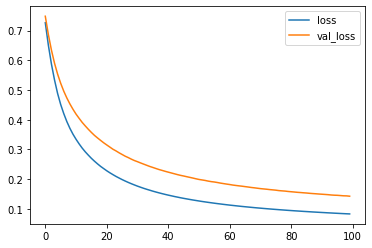

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

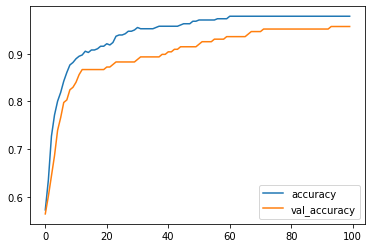

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()